# End Ride Analysis

### -------------------------------------

# Findings Summary

Julie consistently scored higher than Lily on most ratings. Most of these differences were not, however, statistically significant because of the small difference and the small sample size. There were two tests that came back significant:

**'Confidence Score'** - a sum of the user's score for questions rating their confidence in the vehicle's capacity in terms of AV Control, Driving Capability, and Decision-making ability - is statistically significant. Julie scored on average 1.5 points higher than Lily.

**Future Preference** for a digital assistant was also statistically significant. This comes from the fact that 5 users who had Julie requested to have her again the next time, while Lily didn't receive any requests to keep her as the digital assistant.  

Most other columns and metrics were too close to say the differences were statistically significant. 

### -------------------------------------

## EDA

In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('endridecsv.csv')

In [5]:
data.shape
# 27 rows, 57 columns.
#list(data) - all the column names. Some are pretty long so we'll reference many of them by index.
#data2.iloc[:,2:7].head()

(27, 57)

In [6]:
data.head()

,Timestamp,Name,"On a scale from 1-5, how would you rate your overall user experience in terms of: [Comfort & relaxation during the ride]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived personal safety]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived safety of others]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Degree of vehicle trustworthiness]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Willingness to ride again]","On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [AV control ]","On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Driving capability]","On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Decision-making ability]",...,Please indicate if following attributes affected your riding experience: [Swirviness (side to side motion)],Please indicate if following attributes affected your riding experience: [Roundabouts],Please indicate if following attributes affected your riding experience: [Sudden stops],"Please comment on how the above factors affected your riding experience, if there were such factors.","Were there other factors that affected your riding experience? Please identify and comment, if there were such factors.",Name from PRE,Name from POST,Name from END,Intervention,Use?
0,7/17/18,babak mortezai,3,3,4,3,4,4,4,4,...,No,Yes,Yes,car went on stone cobbles which was unexpected,stone cobbles and bumpy ride,babak mortezai,Babak,babak mortezai,Julie,YES
1,7/19/18,Chris,4,4,3,2,5,3,4,3,...,No,Yes,Yes,"Bumpiness is not so bad, Going through the rou...",no,Christian Angerer,Chris,Chris,Lily,Maybe; Semi-autonomous
2,7/23/18,Kristin Muench,4,4,3,3,4,4,4,3,...,No,Yes,Yes,It was bumpy but similar levels of bumpy/bad s...,0,Kristin Muench,Kristin,Kristin Muench,Julie,"Maybe--Wondered if she was being ""punked""; Sem..."
3,7/27/18,daniel landes,5,5,4,4,5,4,4,4,...,No,Yes,Yes,there was a sudden stop in front of someone cr...,no,daniel landes,Danny,daniel landes,Lily,YES
4,7/30/18,Aaron Kau,3,5,5,4,4,4,4,2,...,Yes,Yes,Yes,0,0,Aaron Kau,Aaron,Aaron Kau,Julie,NO; knew this was not an AV and filled out the...


How many users for each assistant? 

In [7]:
pd.crosstab(index=data["Intervention"], columns="count")

col_0,count
Intervention,
Julie,14
Lily,13


### Take out the people that knew what was going on

In [8]:
data[['Intervention','Use?']].head()

,Intervention,Use?
0,Julie,YES
1,Lily,Maybe; Semi-autonomous
2,Julie,"Maybe--Wondered if she was being ""punked""; Sem..."
3,Lily,YES
4,Julie,NO; knew this was not an AV and filled out the...


In [9]:
#data2 = data.loc[~data['Use?'].str.startswith('N')]

# if we want to take out the Use? Semi-autonomous
#data2 = data2.loc[~data2['Use?'].str.startswith('Semi')]

data2 = data.loc[data["Use?"].str.startswith('Y')]

In [10]:
data2[['Intervention','Use?']]

,Intervention,Use?
0,Julie,YES
3,Lily,YES
5,Julie,YES
6,Julie,YES
7,Lily,YES
9,Julie,YES
10,Lily,YES
11,Julie,YES
12,Lily,YES
13,Julie,YES


How many users per assistant now?

In [11]:
pd.crosstab(index=data2["Intervention"], columns="count")

col_0,count
Intervention,
Julie,11
Lily,11


## Summary Tables

#### User Experience

In [12]:
pd.pivot_table(data2, values=(list(data)[2:7]), index=['Intervention'], aggfunc=np.mean)

,"On a scale from 1-5, how would you rate your overall user experience in terms of: [Comfort & relaxation during the ride]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Degree of vehicle trustworthiness]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived personal safety]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived safety of others]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Willingness to ride again]"
Intervention,,,,,
Julie,4.090909,3.818182,4.181818,4.181818,4.545455
Lily,3.818182,3.454545,3.909091,3.636364,4.545455


Julie scored higher, on average, for the User Experience questions except for 'Willingness to Ride Again' where the two digital assistants tied. The 'Willingness to Ride Again' is an important question, so I wonder why Julie scores higher in all of the other questions but not in that. 

#### User Confidence in Vehicle's Capabililty

In [13]:
# next 3 variables
pd.pivot_table(data2, values=(list(data)[7:10]), index=['Intervention'], aggfunc=np.mean)

,"On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [AV control ]","On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Decision-making ability]","On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Driving capability]"
Intervention,,,
Julie,4.636364,4.000000,4.181818
Lily,3.909091,3.272727,3.818182


Julie on average scored higher on all questions related to user confidence. 

#### Friendly, Trustworthy, In Control

In [14]:
pd.pivot_table(data2, values=(list(data)[13:16]), index=['Intervention'], aggfunc=np.mean)

,"On a scale from 1-5, to what degree did the digital assistant make the self-driving vehicle seem to be the following? [Friendly]","On a scale from 1-5, to what degree did the digital assistant make the self-driving vehicle seem to be the following? [In Control]","On a scale from 1-5, to what degree did the digital assistant make the self-driving vehicle seem to be the following? [Trustworthy]"
Intervention,,,
Julie,4.090909,4.000000,4.181818
Lily,3.818182,3.454545,3.454545


Julie again scores higher, on average, than Lily on these questions, most significantly for trustworthiness. Julie scores higher by more ~.6 on average in helping the Self-driving vehicle seem to be in-control and trustworthy.

### Awareness being in an AV

In [15]:
pd.pivot_table(data2, values=(list(data2)[31]), index=['Intervention'], aggfunc=np.mean)

,"On a scale from 1-5, please rate the degree to which the digital assistant distracted you from an awareness of being in an AV?"
Intervention,
Julie,3.000000
Lily,2.454545


This may be important. Julie helped distract the riders more than Lily did.

## Feature Creation

I decided to combine some of the questions to create a relevant aggregate score for certain categories. I aggregated the user scores for the following questions: 

* User Experience questions ('On a scale from 1-5, how would you rate your overall user experience...") were combined to make a "User Experience Score"

* Confidence questions ("On a scale from 1-5, how would you rate your confidence in the vehicle's...") were combined to create a "Confidence Score"

* Friendly, Trustworthy, In Control (To what degree did the digital assistant make the self-driving vehicle seem...") were combined to create a "Friendly, Trustworthy, In Control" score

In [16]:
# create new column - UserEx_Score - that's the sum of columns 2-7
data2 = data2.assign(UX_Score = data2[list(data2)[2:7]].sum(axis = 1))

# Confidence in Vehicle Capability
data2 = data2.assign(Conf_Score = data2[list(data2)[7:10]].sum(axis = 1))

# Trustworthy, Friendly, In Control
data2 = data2.assign(TFiC = data2[list(data2)[13:16]].sum(axis = 1))

In [17]:
data2.head()

,Timestamp,Name,"On a scale from 1-5, how would you rate your overall user experience in terms of: [Comfort & relaxation during the ride]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived personal safety]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived safety of others]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Degree of vehicle trustworthiness]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Willingness to ride again]","On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [AV control ]","On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Driving capability]","On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Decision-making ability]",...,"Please comment on how the above factors affected your riding experience, if there were such factors.","Were there other factors that affected your riding experience? Please identify and comment, if there were such factors.",Name from PRE,Name from POST,Name from END,Intervention,Use?,UX_Score,Conf_Score,TFiC
0,7/17/18,babak mortezai,3,3,4,3,4,4,4,4,...,car went on stone cobbles which was unexpected,stone cobbles and bumpy ride,babak mortezai,Babak,babak mortezai,Julie,YES,17,12,13
3,7/27/18,daniel landes,5,5,4,4,5,4,4,4,...,there was a sudden stop in front of someone cr...,no,daniel landes,Danny,daniel landes,Lily,YES,23,12,12
5,7/31/18,Kevin,3,4,4,3,4,4,3,3,...,Going in a loop while it reroutes is pretty ja...,"Stops feel abrupt sometimes, going through spe...",Kevin Goncalves,Kevin,Kevin,Julie,YES,18,10,9
6,8/3/18,Cortney Hamilton,4,4,4,4,5,5,5,4,...,I didn't like going around the traffic circle ...,No,Cortney Miller,Cortney,Cortney Hamilton,Julie,YES,21,14,12
7,8/3/18,Michelle Blum Atkinson,3,3,2,2,5,3,2,3,...,Some of the above factors made me nervous abou...,I wish I could have seen out the front window ...,Michelle Blum Atkinson,Michelle,Michelle Blum Atkinson,Lily,YES,15,8,12


### Combined Column Scores

In [18]:
pd.pivot_table(data2, values=(list(data2)[57:60]), index=['Intervention'], aggfunc=np.mean)

,Conf_Score,TFiC,UX_Score
Intervention,,,
Julie,12.818182,12.272727,20.818182
Lily,11.000000,10.727273,19.363636


As seen in the other summary tables, Julie scored higher on average than Lily, but only between 1.5 and 2 points. Since these scores are the sum of 3-5 questions, this isn't too big of a difference. 

### Future Preference for Digital Assistant

In [19]:
#if data2[list(data2)[35]] == "Keep the same assitant"
data2[list(data2)[35]].value_counts()

cleanup_nums = {'FuturePreference':     {"Try another assistant": -1, "Keep the same assistant": 1, 
                                         "No preference": 0}}
cleanup_nums

{'FuturePreference': {'Try another assistant': -1,
  'Keep the same assistant': 1,
  'No preference': 0}}

In [20]:
data2 = data2.assign(FuturePreference = data2[list(data2)[35]])

data2.replace(cleanup_nums, inplace=True)

In [21]:
data2.head()

,Timestamp,Name,"On a scale from 1-5, how would you rate your overall user experience in terms of: [Comfort & relaxation during the ride]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived personal safety]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived safety of others]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Degree of vehicle trustworthiness]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Willingness to ride again]","On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [AV control ]","On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Driving capability]","On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Decision-making ability]",...,"Were there other factors that affected your riding experience? Please identify and comment, if there were such factors.",Name from PRE,Name from POST,Name from END,Intervention,Use?,UX_Score,Conf_Score,TFiC,FuturePreference
0,7/17/18,babak mortezai,3,3,4,3,4,4,4,4,...,stone cobbles and bumpy ride,babak mortezai,Babak,babak mortezai,Julie,YES,17,12,13,1
3,7/27/18,daniel landes,5,5,4,4,5,4,4,4,...,no,daniel landes,Danny,daniel landes,Lily,YES,23,12,12,0
5,7/31/18,Kevin,3,4,4,3,4,4,3,3,...,"Stops feel abrupt sometimes, going through spe...",Kevin Goncalves,Kevin,Kevin,Julie,YES,18,10,9,-1
6,8/3/18,Cortney Hamilton,4,4,4,4,5,5,5,4,...,No,Cortney Miller,Cortney,Cortney Hamilton,Julie,YES,21,14,12,1
7,8/3/18,Michelle Blum Atkinson,3,3,2,2,5,3,2,3,...,I wish I could have seen out the front window ...,Michelle Blum Atkinson,Michelle,Michelle Blum Atkinson,Lily,YES,15,8,12,-1


In [22]:
#data2["FuturePreference"].groupby("Intervention").count()
data2.groupby("Intervention")["FuturePreference"].count()
data2.groupby("Intervention")["FuturePreference"].value_counts(sort = False)

Intervention  FuturePreference
Julie         -1                  4
               0                  2
               1                  5
Lily          -1                  8
               0                  3
Name: FuturePreference, dtype: int64

Julie scored 5 'Keep the same assistant', yet Lily didn't score any. 9 of the 12 users who had Lily requested to have a different assistant the next time. 

## Mann-Whitney U test

The Mann-Whitney U test is a non-parametric, unpaired test and will determine if the differences between scores of the digital assistants are significant or not. 

In [23]:
import scipy
from scipy import stats

## Significant tests

#### Confidence Score

In [24]:
print(list(data2)[58])
x = data2.loc[data2['Intervention']=='Julie'][list(data2)[58]]
y = data2.loc[data2['Intervention']=='Lily'][list(data2)[58]]
scipy.stats.mannwhitneyu(x,y, alternative = 'two-sided')

Conf_Score


MannwhitneyuResult(statistic=96.0, pvalue=0.01951748118217775)

#### Future Preference for a Digital Assistant

In [25]:
i = 60
print(list(data2)[i])
x = data2.loc[data2['Intervention']=='Julie'][list(data2)[i]]
y = data2.loc[data2['Intervention']=='Lily'][list(data2)[i]]
print(scipy.stats.mannwhitneyu(x,y, alternative = 'two-sided'))

FuturePreference
MannwhitneyuResult(statistic=90.0, pvalue=0.03501555442686633)


## Insignificant tests

#### Comparing Comfort and Relaxation During the Ride

In [26]:
print(list(data2)[2])
x = data2.loc[data2['Intervention']=='Julie'][list(data2)[2]]
y = data2.loc[data2['Intervention']=='Lily'][list(data2)[2]]
scipy.stats.mannwhitneyu(x,y, alternative = 'greater')

On a scale from 1-5, how would you rate your overall user experience in terms of: [Comfort & relaxation during the ride]


MannwhitneyuResult(statistic=69.5, pvalue=0.2782804789848343)

#### User Experience Score

In [27]:
print(list(data2)[57])
x = data2.loc[data2['Intervention']=='Julie'][list(data2)[57]]
y = data2.loc[data2['Intervention']=='Lily'][list(data2)[57]]
scipy.stats.mannwhitneyu(x,y, alternative = 'two-sided')

UX_Score


MannwhitneyuResult(statistic=74.5, pvalue=0.37237387607788974)

#### Trustworthy, In Control, Friendly Score

In [28]:
i = 59
print(list(data2)[i])
x = data2.loc[data2['Intervention']=='Julie'][list(data2)[i]]
y = data2.loc[data2['Intervention']=='Lily'][list(data2)[i]]
print(scipy.stats.mannwhitneyu(x,y, alternative = 'two-sided'))

TFiC
MannwhitneyuResult(statistic=78.5, pvalue=0.24537030363424872)


## Visualizations

In [29]:
# next 3 variables
confid = pd.pivot_table(data2, values=(list(data)[7:10]), index=['Intervention'], aggfunc=np.mean)
confid

,"On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [AV control ]","On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Decision-making ability]","On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Driving capability]"
Intervention,,,
Julie,4.636364,4.000000,4.181818
Lily,3.909091,3.272727,3.818182


Current size: [12.0, 9.0]


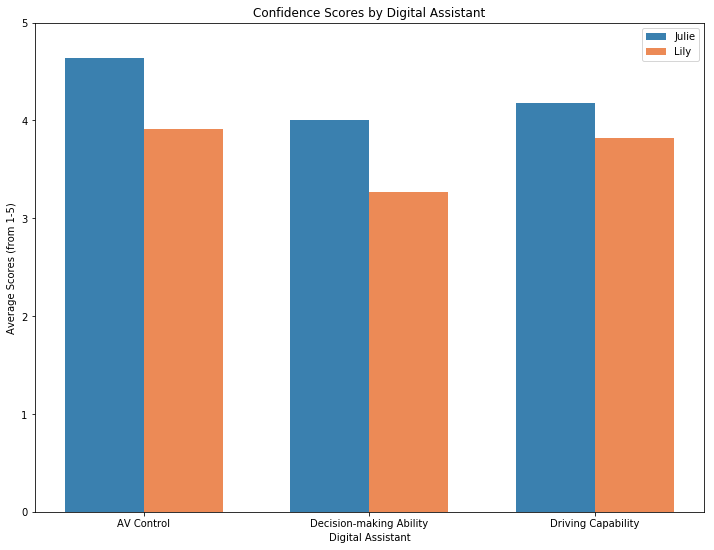

<Figure size 1080x1080 with 0 Axes>

In [39]:
#import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 3
#means_frank = (90, 55, 40, 65)
#means_guido = (85, 62, 54, 20)

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
 
# create plot
fig, ax = plt.subplots()
#fig.figsize()
index = np.arange(3)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, confid.iloc[0], bar_width,
                 alpha=opacity,
                 color='#09619b',  #115f93
                 label='Julie')
 
rects2 = plt.bar(index + bar_width, confid.iloc[1], bar_width,
                 alpha=opacity,
                 color='#e86d2c',
                 label='Lily')
 
plt.xlabel('Digital Assistant')
plt.ylabel('Average Scores (from 1-5)')
plt.ylim([0,5])
plt.title('Confidence Scores by Digital Assistant')
plt.xticks(index + bar_width/2, ('AV Control', 'Decision-making Ability', 'Driving Capability'))
plt.legend()
plt.figure(figsize=(15,15))
 
plt.tight_layout()
plt.show()

In [38]:
confid.iloc[1]

On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [AV control ]                3.909091
On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Decision-making ability]    3.272727
On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Driving capability]         3.818182
Name: Lily, dtype: float64

In [68]:
ux = pd.pivot_table(data2, values=(list(data2)[57]), index=['Intervention'], aggfunc=np.mean)

In [88]:
b = data2.drop(data2.columns[0:16], axis = 1)
b = b.drop(b.columns[2:39], axis = 1)
b

,Please check all adjectives that would best describe the self-driving vehicle (select all that apply).,Please specify any other adjectives that would best describe the assistant not included in the list above.,Intervention,Use?,UX_Score,Conf_Score,TFiC,FuturePreference
0,"Helpful, Informative, Proactive",0,Julie,YES,17,12,13,1
3,"Indifferent, Proactive, Trustworthy",robotic,Lily,YES,23,12,12,0
5,"Cold, Indifferent, Passive, Trustworthy",0,Julie,YES,18,10,9,-1
6,"Helpful, Proactive, Trustworthy",Personable,Julie,YES,21,14,12,1
7,"Helpful, Informative, Passive",curious,Lily,YES,15,8,12,-1
9,"Comforting, Friendly, Helpful",0,Julie,YES,23,13,13,-1
10,Proactive,calm,Lily,YES,21,11,10,-1
11,"Friendly, Helpful, Informative",efficient,Julie,YES,20,12,12,0
12,"Cold, Indifferent, Passive",0,Lily,YES,18,11,6,-1
13,"Comforting, Friendly, Helpful, Informative, Ki...",0,Julie,YES,25,14,15,0
